In [1]:
from dataset import PerformanceChunks
import torch

import librosa
import librosa.display
import matplotlib.pyplot as plt
import matplotlib.animation as animation

import h5py

In [9]:
dataset = PerformanceChunks(
    dataset_meta_csv_path="/home/pasinducw/Downloads/Research-Datasets/Da-TACOS/da-tacos_metadata/da-tacos-single-performance-meta.csv",
    base_dir="/home/pasinducw/Downloads/Research-Datasets/Da-TACOS/da-tacos_coveranalysis_subset_crema",
    feature_type="crema",
    time_axis=1,
    frames_per_sample=4096,
    hop_length=128
)
dataloader = torch.utils.data.DataLoader(
    dataset, batch_size=1, num_workers=0, shuffle=False)
it = iter(dataloader)

(12, 4095)


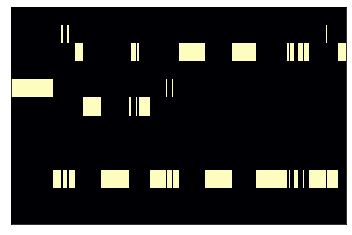

In [10]:
X,Y = next(iter(dataloader))
X = X.squeeze()
X = X.numpy().transpose()
print(X.shape)

librosa.display.specshow(X)

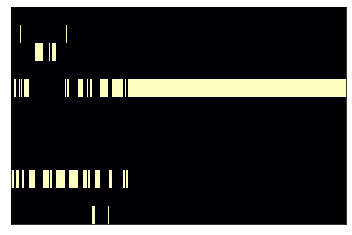

In [11]:
frames = []
for X,Y in iter(dataloader):
    X = X.squeeze()
    X = X.numpy().transpose()
    frames.append(librosa.display.specshow(X))


# Analyzing the raw data

In [31]:
import h5py
import pandas as pd
import os
import json

In [43]:
dataset_meta_csv_path="/home/pasinducw/Downloads/Research-Datasets/Da-TACOS/da-tacos_metadata/da-tacos-single-performance-meta.csv"
dataset_meta_csv_path="/home/pasinducw/Downloads/Research-Datasets/Da-TACOS/da-tacos_metadata/da-tacos_coveranalysis_subset_metadata.csv"
base_dir="/home/pasinducw/Downloads/Research-Datasets/Da-TACOS/da-tacos_coveranalysis_subset_crema"

In [46]:
dataset = pd.read_csv(dataset_meta_csv_path)
dataset



,workId,performanceId,workTitle,performanceTitle,performanceArtist,releaseYear,instrumental
0,W_163992,P_547131,"Trade Winds, Trade Winds","Trade Winds, Trade Winds",Aki Aleong,1961,No
1,W_163992,P_547140,"Trade Winds, Trade Winds","Trade Winds, Trade Winds",Dodie Stevens,1961,No
2,W_163629,P_544605,Ecstasy,Ecstasy,New Order,1983,No
3,W_163629,P_544606,Ecstasy,Ecstasy,Walls [GB],2011,No
4,W_163747,P_545342,"You Don't Wanna Be My Girlfriend, Phoebe","You Don't Wanna Be My Girlfriend, Phoebe",My Little Airport,2004,No
...,...,...,...,...,...,...,...
9995,W_172137,P_602149,I'm Caught Up,I'm Caught Up,Tokyo Discotheque Orchestra feat. GILLE,2015,No
9996,W_172584,P_735355,I Don't Believe a Word,I Don't Believe a Word,Philiae,2003,No
9997,W_172584,P_605044,I Don't Believe a Word,I Don't Believe a Word,Fireball Ministry,2017,No
9998,W_172765,P_606081,Man with the Mandolin,The Man with the Mandolin,Lew Stone and His Band,1939,No


['W_173442', 'P_610674', 'Faust', 'Faust', 'Annie Barbazza', '2017', 'No']
Faust
(12, 19198)


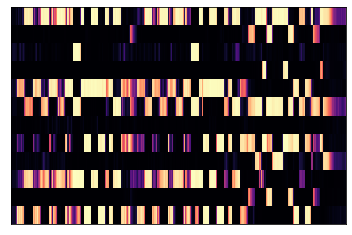

In [89]:
entry = dataset.values.tolist()[17]

work_id=entry[0]
performance_id = entry[1]
feature = "crema"

feature_path = [base_dir, "%s_%s" % (work_id, feature), "%s_%s.h5" % (performance_id, feature)]
feature_path = os.path.join(*feature_path)
file = h5py.File(feature_path)

print(entry)
print(entry[2])
print(file[feature].shape)
librosa.display.specshow(file[feature])


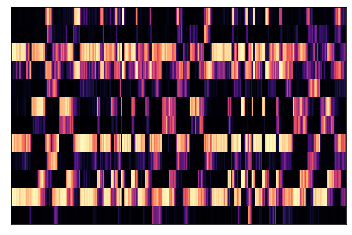